In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Preparing the dataset

In [4]:
df = pd.read_csv('MNISTtrain.csv').values
print(df.shape)

(42000, 785)


In [5]:
X = df[:,1:]
Y = df[:,0]
print(X.shape,Y.shape)

(42000, 784) (42000,)


#### Splitting the dataset

In [7]:
split = int(0.8*(X.shape[0]))
X_train = X[:split,:]
Y_train = Y[:split]
X_test = X[split:,:]
Y_test = Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


#### Visualising some samples

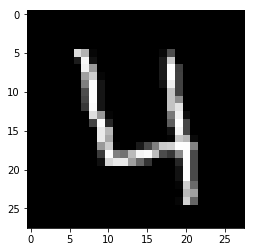

Original label is:  4


In [10]:
def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

drawImg(X_train[3])
print("Original label is: ",Y_train[3])

#### Applying KNN on the dataset

In [13]:
def distance(x1,x2):
    # if the points are as (1,2,3) and (4,5,6), then there dist will be given as: sqrt((1-4)**2 + (2-5)**2 + (3-6)**2 )
    # = sqrt(9+9+9) = sqrt(27)
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,query_point,k=5):
    dist=[]
    m=X.shape[0]
    
    for i in range(m):
        d = distance(query_point,X[i])
        dist.append((d,Y[i])) # Storing the distance along with the label as a tuple
        
    #Now sorting the dist list based on the nearest d values
    dist = sorted(dist)
    
    #for K nearest distance values
    dist = dist[:k]
    
    dist = np.array(dist)
    
    #To count the no. of unique labels in in the list
    new_vals = np.unique(dist[:,1],return_counts=True)
    index = new_vals[1].argmax() #it gives the index of label having maximum count
    pred = new_vals[0][index]
    
    return pred

#### Making Predictions

In [17]:
pred = knn(X_train,Y_train,X_test[5])
print(int(pred))

6


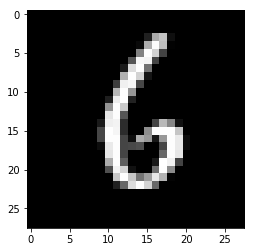

6


In [16]:
drawImg(X_test[5])
print(Y_test[5])